# Part 1: Set up

In [2]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('winequality-red.csv')
X = df.drop(columns=['quality'])
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# Part 2: Inherently interpretable models

Root Mean Squared Error: 0.6513


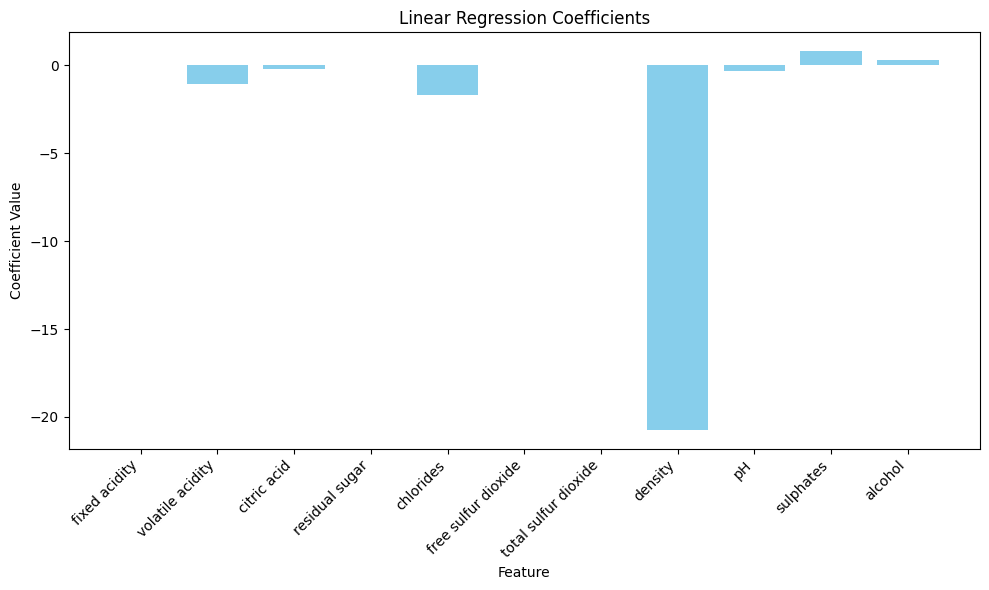

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.4f}")

# Get feature coefficients and names
coefficients = model.coef_
feature_names = X_train.columns

# Create bar plot of coefficients
plt.figure(figsize=(10, 6))  # Adjust size as needed
plt.bar(feature_names, coefficients, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Feature")
plt.ylabel("Coefficient Value")
plt.title("Linear Regression Coefficients")
plt.tight_layout()
plt.show()


Root Mean Squared Error (Normalized): 0.6513


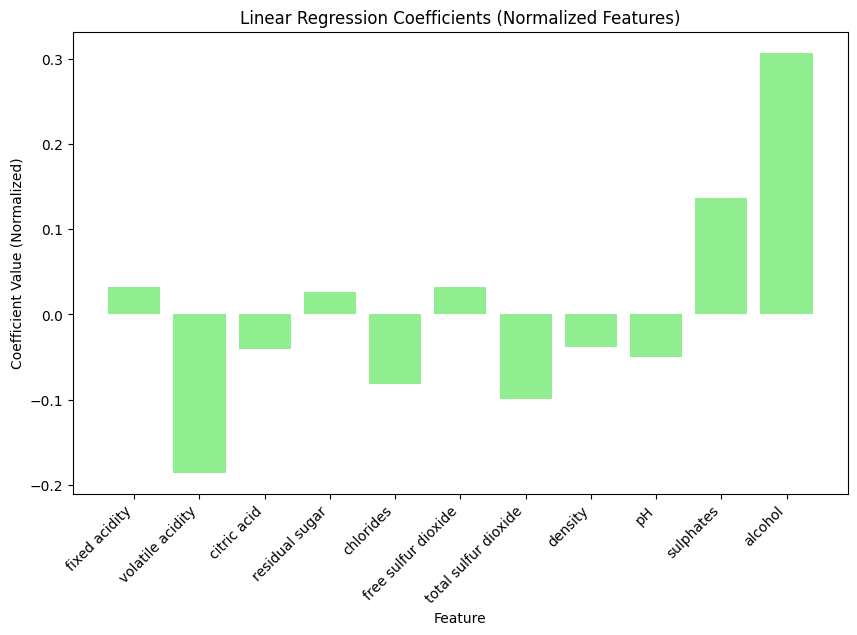

In [5]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit scaler on training data and transform
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)  # Use the same scaler

# Initialize the model
model_normalized = LinearRegression()

# Train the model
model_normalized.fit(X_train_normalized, y_train)

# Make predictions on the test data
y_pred_normalized = model_normalized.predict(X_test_normalized)

# Calculate RMSE
rmse_normalized = np.sqrt(mean_squared_error(y_test, y_pred_normalized))
print(f"Root Mean Squared Error (Normalized): {rmse_normalized:.4f}")

# Get feature coefficients and names
coefficients_normalized = model_normalized.coef_
feature_names = X_train.columns

# Create bar plot of coefficients
plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients_normalized, color='lightgreen')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Feature")
plt.ylabel("Coefficient Value (Normalized)")
plt.title("Linear Regression Coefficients (Normalized Features)")
plt.show()


Lasso RMSE: 0.6903
Ridge RMSE: 0.6514


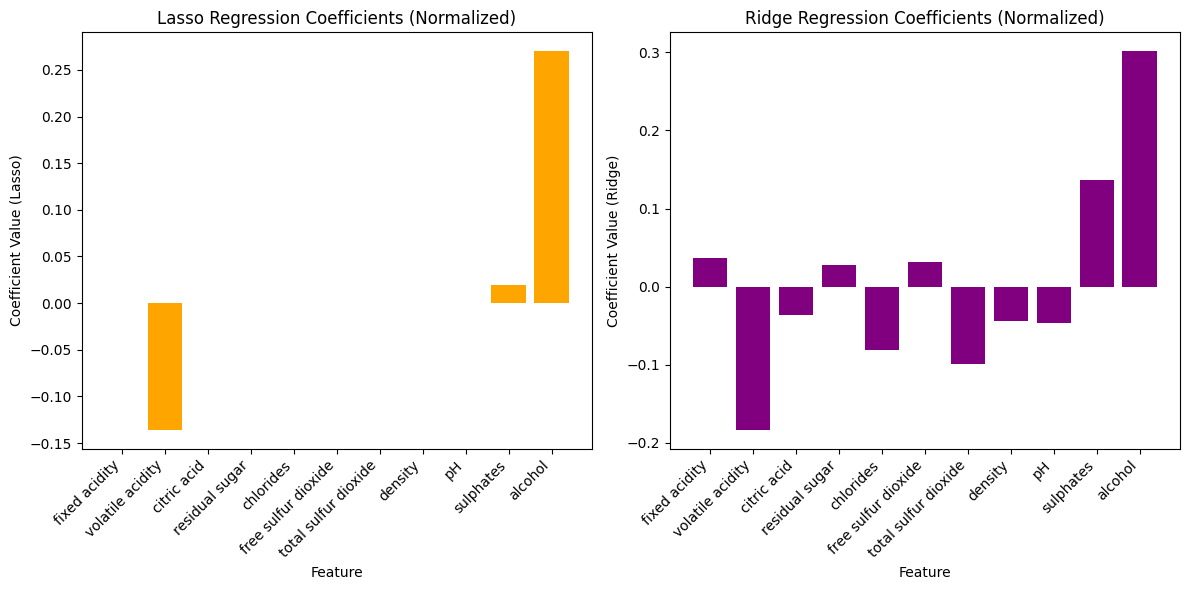

In [6]:
from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_normalized, y_train)
y_pred_lasso = lasso_model.predict(X_test_normalized)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

# Ridge Regression
ridge_model = Ridge(alpha=10.0)
ridge_model.fit(X_train_normalized, y_train)
y_pred_ridge = ridge_model.predict(X_test_normalized)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print(f"Lasso RMSE: {rmse_lasso:.4f}")
print(f"Ridge RMSE: {rmse_ridge:.4f}")

# Bar plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(feature_names, lasso_model.coef_, color='orange')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Feature")
plt.ylabel("Coefficient Value (Lasso)")
plt.title("Lasso Regression Coefficients (Normalized)")

plt.subplot(1, 2, 2)
plt.bar(feature_names, ridge_model.coef_, color='purple')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Feature")
plt.ylabel("Coefficient Value (Ridge)")
plt.title("Ridge Regression Coefficients (Normalized)")

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


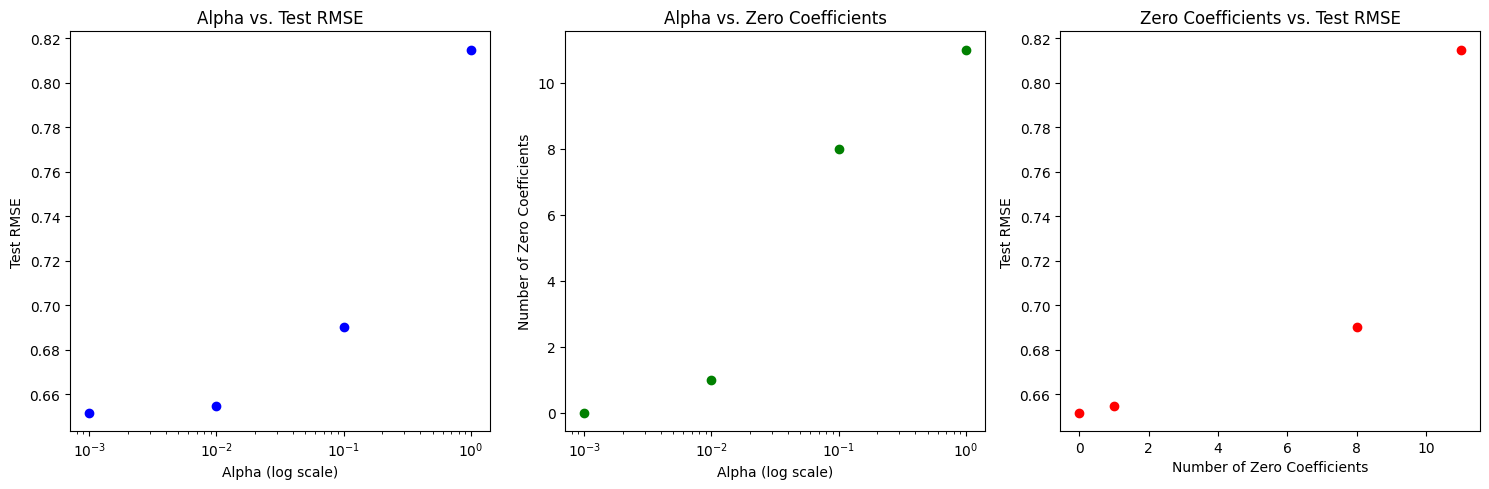

In [7]:
alphas = [0.001, 0.01, 0.1, 1.0]
test_rmse = []
zero_coefs = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_normalized, y_train)
    y_pred_lasso = lasso_model.predict(X_test_normalized)
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
    zero_coefs.append(np.sum(lasso_model.coef_ == 0))

# Scatter plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(alphas, test_rmse, color='blue')
plt.xscale('log')
plt.xlabel("Alpha (log scale)")
plt.ylabel("Test RMSE")
plt.title("Alpha vs. Test RMSE")

plt.subplot(1, 3, 2)
plt.scatter(alphas, zero_coefs, color='green')
plt.xscale('log')
plt.xlabel("Alpha (log scale)")
plt.ylabel("Number of Zero Coefficients")
plt.title("Alpha vs. Zero Coefficients")

plt.subplot(1, 3, 3)
plt.scatter(zero_coefs, test_rmse, color='red')
plt.xlabel("Number of Zero Coefficients")
plt.ylabel("Test RMSE")
plt.title("Zero Coefficients vs. Test RMSE")

plt.tight_layout()
plt.show()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 3.0 MB/s eta 0:00:00


100% (11 of 11) |########################| Elapsed Time: 0:00:03 Time:  0:00:03


GAM RMSE: 0.6439


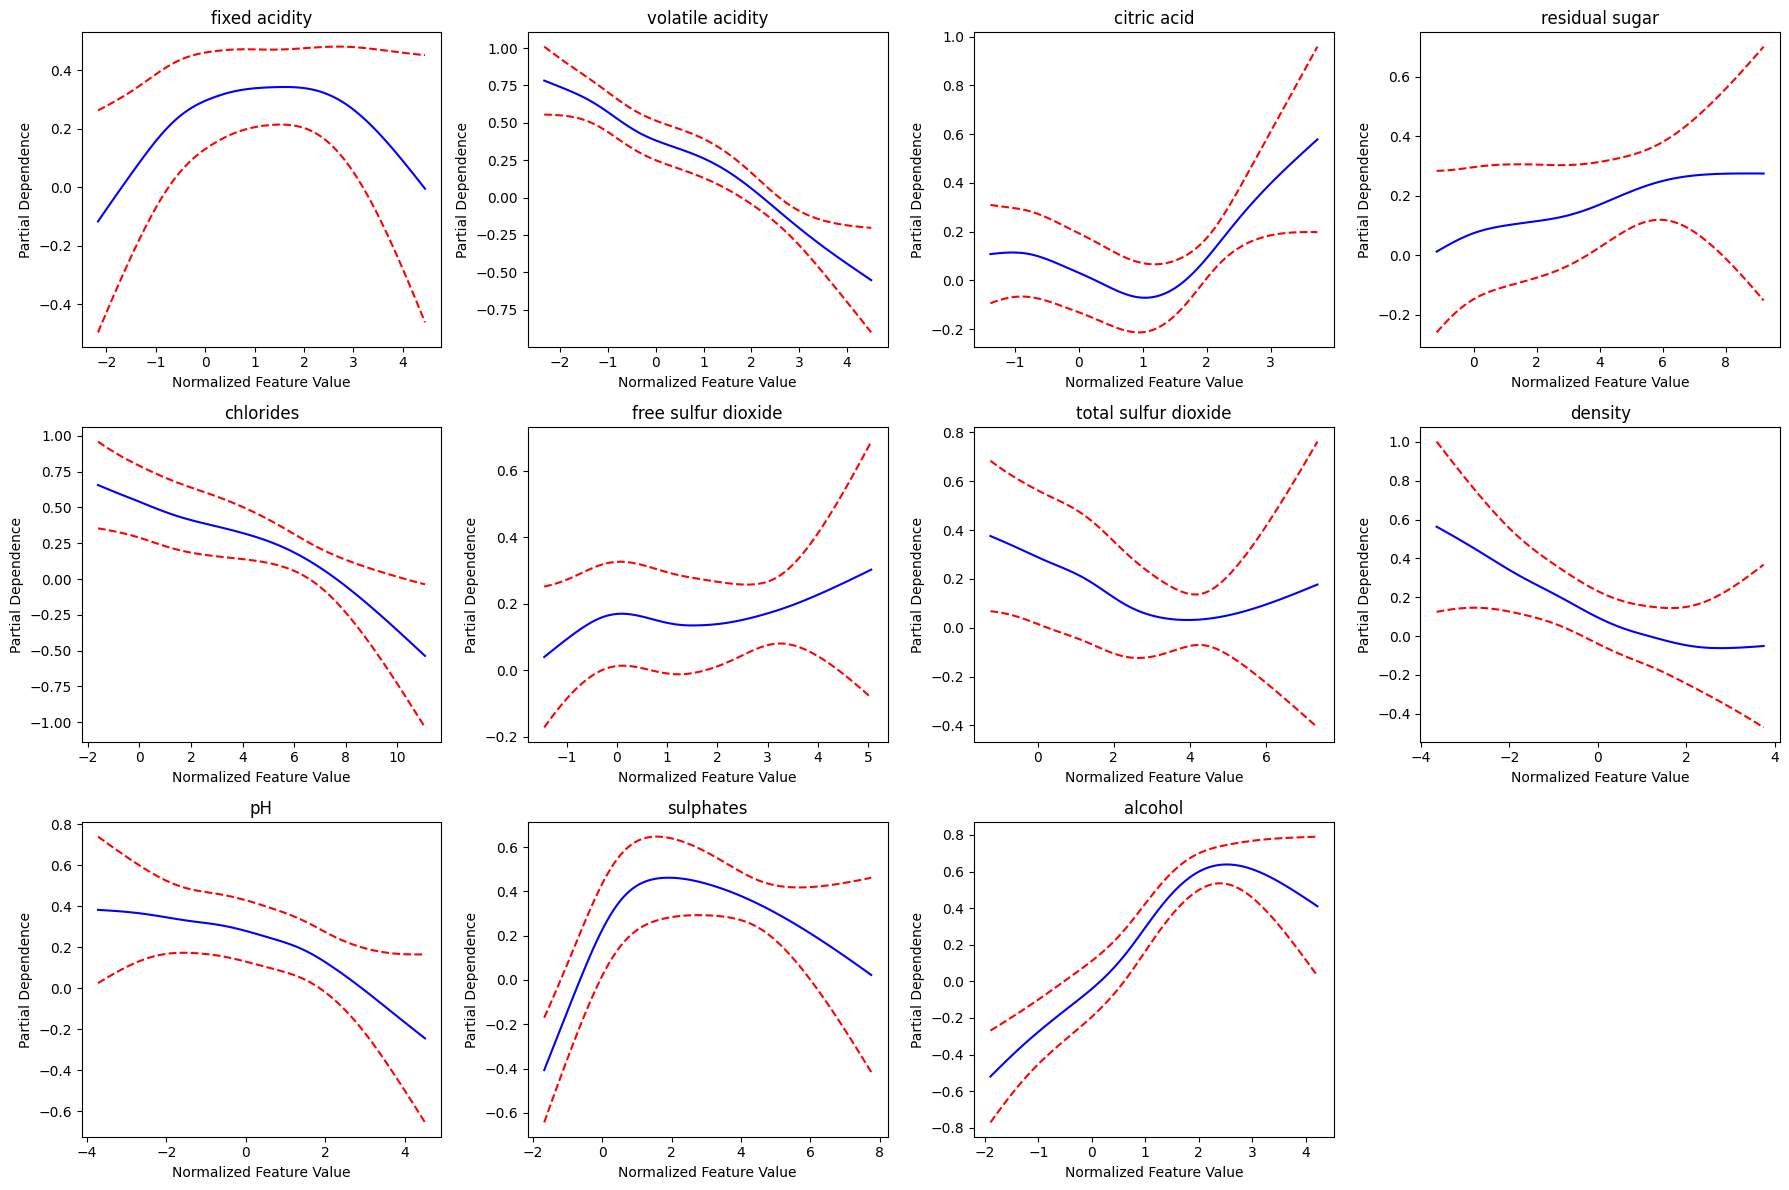

In [8]:
!pip install pygam
from pygam import LinearGAM, s

# Define GAM with splines for each feature
gam = LinearGAM(
    s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10)
)  # Assuming 11 features

# Train the GAM
gam.gridsearch(X_train_normalized, y_train)

# Predict on test data
y_pred_gam = gam.predict(X_test_normalized)

# Calculate RMSE
rmse_gam = np.sqrt(mean_squared_error(y_test, y_pred_gam))
print(f"GAM RMSE: {rmse_gam:.4f}")

# Plot partial dependence for each feature
plt.figure(figsize=(18, 12))
for i, feature_name in enumerate(X_train.columns):
    plt.subplot(3, 4, i + 1)  # 3 rows, 4 columns of plots
    XX = gam.generate_X_grid(term=i)
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX), color='blue')
    plt.plot(
        XX[:, i],
        gam.partial_dependence(term=i, X=XX, width=0.95)[1],
        color='red',
        ls='--',
    )  # 95% confidence interval
    plt.title(f"{feature_name}")
    plt.xlabel("Normalized Feature Value")
    plt.ylabel("Partial Dependence")
plt.tight_layout()
plt.show()


In [9]:
from sklearn.ensemble import GradientBoostingRegressor

# Weak Baseline: Predict Mean
y_pred_mean = np.full_like(y_test, y_train.mean())
rmse_mean = np.sqrt(mean_squared_error(y_test, y_pred_mean))

# Strong Baseline: Gradient Boosting Machine
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_normalized, y_train)
y_pred_gb = gb_model.predict(X_test_normalized)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

print(f"Weak Baseline (Mean Prediction) RMSE: {rmse_mean:.4f}")
print(f"Strong Baseline (Gradient Boosting) RMSE: {rmse_gb:.4f}")

# Comparison (Assuming you have RMSEs from previous models)
print("\nComparison of RMSEs:")
print(f" - Linear Regression: {rmse:.4f}")                 # From part (a)
print(f" - Linear Regression (Normalized): {rmse_normalized:.4f}")  # From part (b)
print(f" - Lasso (alpha=0.1): {rmse_lasso:.4f}")          # From part (c)
print(f" - Ridge (alpha=10.0): {rmse_ridge:.4f}")        # From part (c)
print(f" - GAM: {rmse_gam:.4f}")                         # From the previous response


Weak Baseline (Mean Prediction) RMSE: 1.0508
Strong Baseline (Gradient Boosting) RMSE: 0.6544

Comparison of RMSEs:
 - Linear Regression: 0.6513
 - Linear Regression (Normalized): 0.6513
 - Lasso (alpha=0.1): 0.6903
 - Ridge (alpha=10.0): 0.6514
 - GAM: 0.6439


# Part 3: Instance Explanations

In [10]:
!pip install shap
import shap
import numpy as np
from sklearn.model_selection import train_test_split


def load_mislabeled_data(test_size=0.99, n_flips=50, seed=1904):
    """Load census dataset and mislabel samples.

    Args:
      test_size: Percentage of data to reserve for test data.
        Use this parameter to shrink the size of the training data.
      n_flips: number of training labels to flip.
      seed: random seed to randomly choose samples to flip.

    Returns:
      X_train: training input data.
      X_test: testing input data.
      y_train: training output.
      y_test: testing output.
      is_flip: boolean array representing mislabeled samples.
    """
    X, y = shap.datasets.adult()

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=7)

    # Randomly mislabel training data
    np.random.seed(seed)
    flip_inds = np.random.choice(
        range(X_train.shape[0]), n_flips, replace=False)
    is_flip = np.zeros(X_train.shape[0]).astype('bool')
    is_flip[flip_inds] = True
    y_train[flip_inds] = 1 - y_train[flip_inds]

    return X_train, X_test, y_train, y_test, is_flip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.4 MB/s eta 0:00:00


In [11]:
# Load mislabeled data
data = load_mislabeled_data(test_size=0.99)
X_train, X_test, y_train, y_test, is_flip = data

# Check number of training samples
num_train_samples = len(X_train)
print(f"Number of training samples: {num_train_samples}")


Number of training samples: 325


Random Importance Scores - AUROC: 0.4929
Random Importance Scores - AUPR: 0.1554


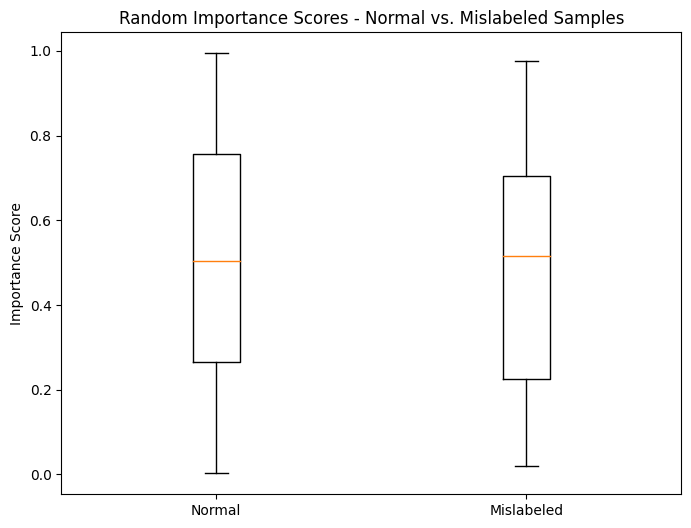

In [12]:
from sklearn.metrics import roc_auc_score, average_precision_score

# Random importance scores
np.random.seed(1904)  # Set a random seed for reproducibility
random_scores = np.random.rand(num_train_samples)

# Calculate AUROC and AUPR
auroc_random = roc_auc_score(is_flip, random_scores)
auprc_random = average_precision_score(is_flip, random_scores)

print(f"Random Importance Scores - AUROC: {auroc_random:.4f}")
print(f"Random Importance Scores - AUPR: {auprc_random:.4f}")

# Boxplots
plt.figure(figsize=(8, 6))
plt.boxplot([random_scores[~is_flip], random_scores[is_flip]], labels=['Normal', 'Mislabeled'])
plt.title("Random Importance Scores - Normal vs. Mislabeled Samples")
plt.ylabel("Importance Score")
plt.show()


Leave-One-Out Importance - AUROC: 0.1322
Leave-One-Out Importance - AUPR: 0.0925


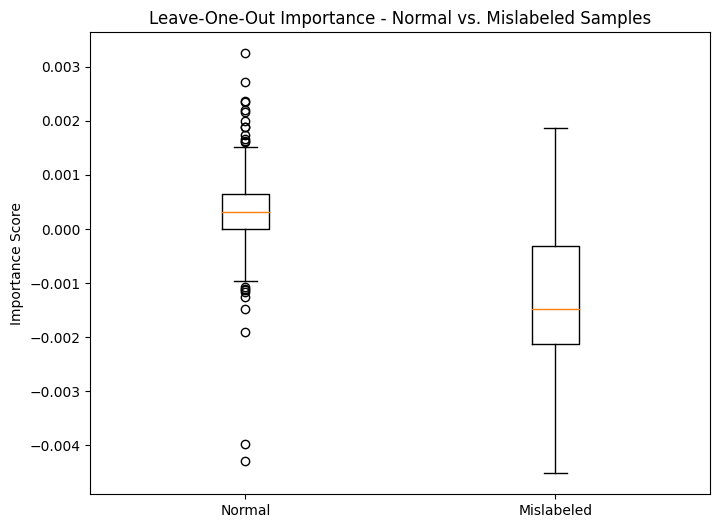

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Standardize the data (may help with convergence)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Train full model
model_full = LogisticRegression(max_iter=1000)
model_full.fit(X_train_std, y_train)
y_pred_full = model_full.predict_proba(X_test_std)[:, 1]
loss_full = log_loss(y_test, y_pred_full)

# Leave-one-out importance
loo_importance = []
for i in range(num_train_samples):
    # Train model without the i-th sample
    X_train_loo = np.delete(X_train_std, i, axis=0)
    y_train_loo = np.delete(y_train, i)
    model_loo = LogisticRegression(max_iter=1000)
    model_loo.fit(X_train_loo, y_train_loo)
    y_pred_loo = model_loo.predict_proba(X_test_std)[:, 1]

    # Calculate loss difference
    loss_loo = log_loss(y_test, y_pred_loo)
    loo_importance.append(loss_loo - loss_full)

# Convert loo_importance to a NumPy array
loo_importance = np.array(loo_importance)

# Calculate AUROC and AUPR
auroc_loo = roc_auc_score(is_flip, loo_importance)
auprc_loo = average_precision_score(is_flip, loo_importance)

print(f"Leave-One-Out Importance - AUROC: {auroc_loo:.4f}")
print(f"Leave-One-Out Importance - AUPR: {auprc_loo:.4f}")

# Boxplots
plt.figure(figsize=(8, 6))
plt.boxplot([loo_importance[~is_flip], loo_importance[is_flip]], labels=['Normal', 'Mislabeled'])
plt.title("Leave-One-Out Importance - Normal vs. Mislabeled Samples")
plt.ylabel("Importance Score")
plt.show()


Number of training samples: 1628
(Medium Dataset) Random Importance Scores - AUROC: 0.4992
(Medium Dataset) Random Importance Scores - AUPR: 0.0300


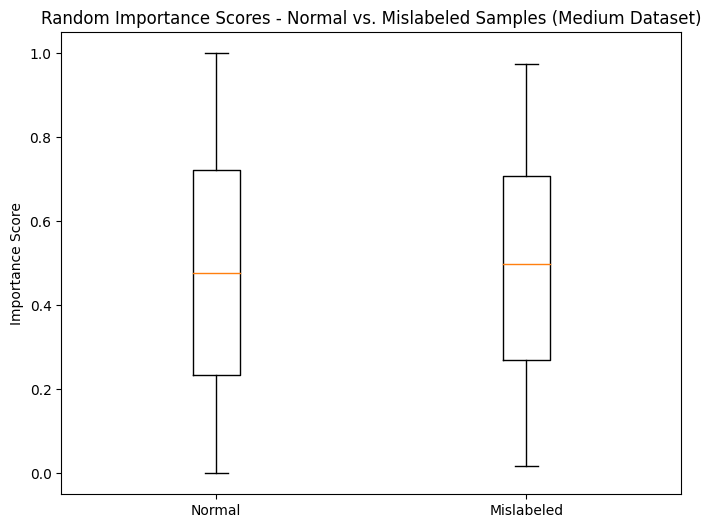

(Medium Dataset) Leave-One-Out Importance - AUROC: 0.2131
(Medium Dataset) Leave-One-Out Importance - AUPR: 0.0220


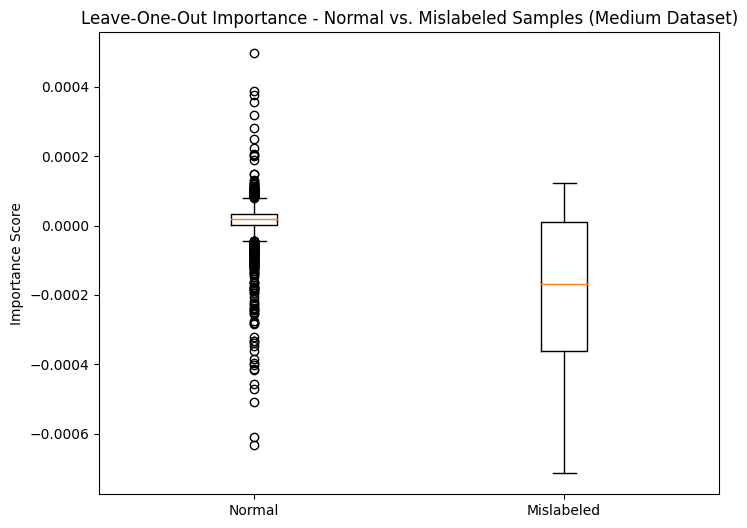

In [14]:
# Load mislabeled data -- medium dataset
data = load_mislabeled_data(test_size=0.95)
X_train, X_test, y_train, y_test, is_flip = data

# Check number of training samples
num_train_samples = len(X_train)
print(f"Number of training samples: {num_train_samples}")

# Part B --------------------------------------

# Random importance scores
np.random.seed(1904)  # Set a random seed for reproducibility
random_scores = np.random.rand(num_train_samples)

# Calculate AUROC and AUPR
auroc_random = roc_auc_score(is_flip, random_scores)
auprc_random = average_precision_score(is_flip, random_scores)

print(f"(Medium Dataset) Random Importance Scores - AUROC: {auroc_random:.4f}")
print(f"(Medium Dataset) Random Importance Scores - AUPR: {auprc_random:.4f}")

# Boxplots
plt.figure(figsize=(8, 6))
plt.boxplot([random_scores[~is_flip], random_scores[is_flip]], labels=['Normal', 'Mislabeled'])
plt.title("Random Importance Scores - Normal vs. Mislabeled Samples (Medium Dataset)")
plt.ylabel("Importance Score")
plt.show()

# Part C --------------------------------------

# Standardize the data (may help with convergence)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Train full model
model_full = LogisticRegression(max_iter=1000)
model_full.fit(X_train_std, y_train)
y_pred_full = model_full.predict_proba(X_test_std)[:, 1]
loss_full = log_loss(y_test, y_pred_full)

# Leave-one-out importance
loo_importance = []
for i in range(num_train_samples):
    # Train model without the i-th sample
    X_train_loo = np.delete(X_train_std, i, axis=0)
    y_train_loo = np.delete(y_train, i)
    model_loo = LogisticRegression(max_iter=1000)
    model_loo.fit(X_train_loo, y_train_loo)
    y_pred_loo = model_loo.predict_proba(X_test_std)[:, 1]

    # Calculate loss difference
    loss_loo = log_loss(y_test, y_pred_loo)
    loo_importance.append(loss_loo - loss_full)

# Convert loo_importance to a NumPy array
loo_importance = np.array(loo_importance)

# Calculate AUROC and AUPR
auroc_loo = roc_auc_score(is_flip, loo_importance)
auprc_loo = average_precision_score(is_flip, loo_importance)

print(f"(Medium Dataset) Leave-One-Out Importance - AUROC: {auroc_loo:.4f}")
print(f"(Medium Dataset) Leave-One-Out Importance - AUPR: {auprc_loo:.4f}")

# Boxplots
plt.figure(figsize=(8, 6))
plt.boxplot([loo_importance[~is_flip], loo_importance[is_flip]], labels=['Normal', 'Mislabeled'])
plt.title("Leave-One-Out Importance - Normal vs. Mislabeled Samples (Medium Dataset)")
plt.ylabel("Importance Score")
plt.show()

Number of training samples: 3256
(Large Dataset) Random Importance Scores - AUROC: 0.4978
(Large Dataset) Random Importance Scores - AUPR: 0.0156


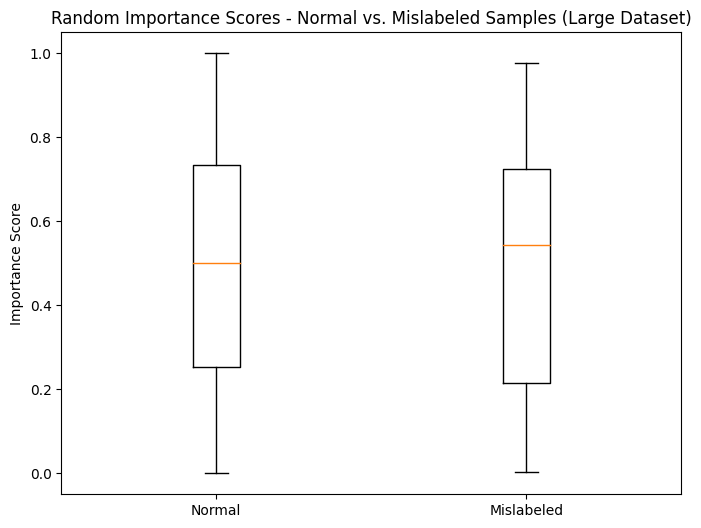

(Large Dataset) Leave-One-Out Importance - AUROC: 0.2817
(Large Dataset) Leave-One-Out Importance - AUPR: 0.0365


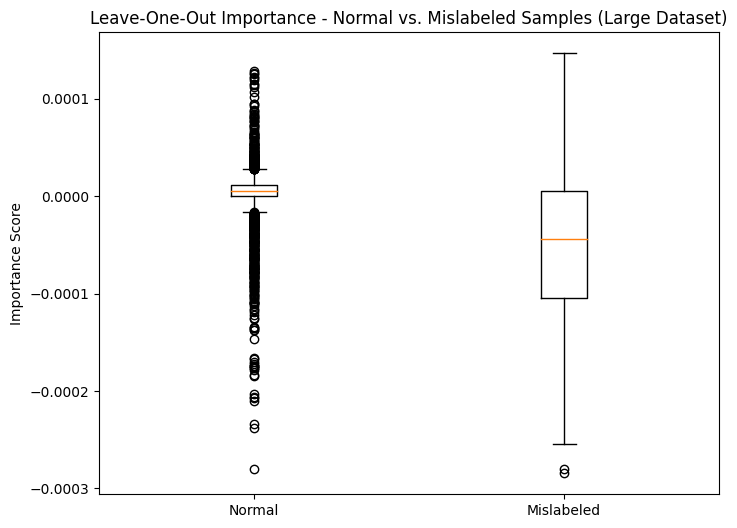

In [15]:
# Load mislabeled data -- large dataset
data = load_mislabeled_data(test_size=0.90)
X_train, X_test, y_train, y_test, is_flip = data

# Check number of training samples
num_train_samples = len(X_train)
print(f"Number of training samples: {num_train_samples}")

# Part B --------------------------------------

# Random importance scores
np.random.seed(1904)  # Set a random seed for reproducibility
random_scores = np.random.rand(num_train_samples)

# Calculate AUROC and AUPR
auroc_random = roc_auc_score(is_flip, random_scores)
auprc_random = average_precision_score(is_flip, random_scores)

print(f"(Large Dataset) Random Importance Scores - AUROC: {auroc_random:.4f}")
print(f"(Large Dataset) Random Importance Scores - AUPR: {auprc_random:.4f}")

# Boxplots
plt.figure(figsize=(8, 6))
plt.boxplot([random_scores[~is_flip], random_scores[is_flip]], labels=['Normal', 'Mislabeled'])
plt.title("Random Importance Scores - Normal vs. Mislabeled Samples (Large Dataset)")
plt.ylabel("Importance Score")
plt.show()

# Part C --------------------------------------

# Standardize the data (may help with convergence)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Train full model
model_full = LogisticRegression(max_iter=1000)
model_full.fit(X_train_std, y_train)
y_pred_full = model_full.predict_proba(X_test_std)[:, 1]
loss_full = log_loss(y_test, y_pred_full)

# Leave-one-out importance
loo_importance = []
for i in range(num_train_samples):
    # Train model without the i-th sample
    X_train_loo = np.delete(X_train_std, i, axis=0)
    y_train_loo = np.delete(y_train, i)
    model_loo = LogisticRegression(max_iter=1000)
    model_loo.fit(X_train_loo, y_train_loo)
    y_pred_loo = model_loo.predict_proba(X_test_std)[:, 1]

    # Calculate loss difference
    loss_loo = log_loss(y_test, y_pred_loo)
    loo_importance.append(loss_loo - loss_full)

# Convert loo_importance to a NumPy array
loo_importance = np.array(loo_importance)

# Calculate AUROC and AUPR
auroc_loo = roc_auc_score(is_flip, loo_importance)
auprc_loo = average_precision_score(is_flip, loo_importance)

print(f"(Large Dataset) Leave-One-Out Importance - AUROC: {auroc_loo:.4f}")
print(f"(Large Dataset) Leave-One-Out Importance - AUPR: {auprc_loo:.4f}")

# Boxplots
plt.figure(figsize=(8, 6))
plt.boxplot([loo_importance[~is_flip], loo_importance[is_flip]], labels=['Normal', 'Mislabeled'])
plt.title("Leave-One-Out Importance - Normal vs. Mislabeled Samples (Large Dataset)")
plt.ylabel("Importance Score")
plt.show()

(Large Dataset) Per-Sample Loss - AUROC: 0.9052
(Large Dataset) Per-Sample Loss - AUPR: 0.2319


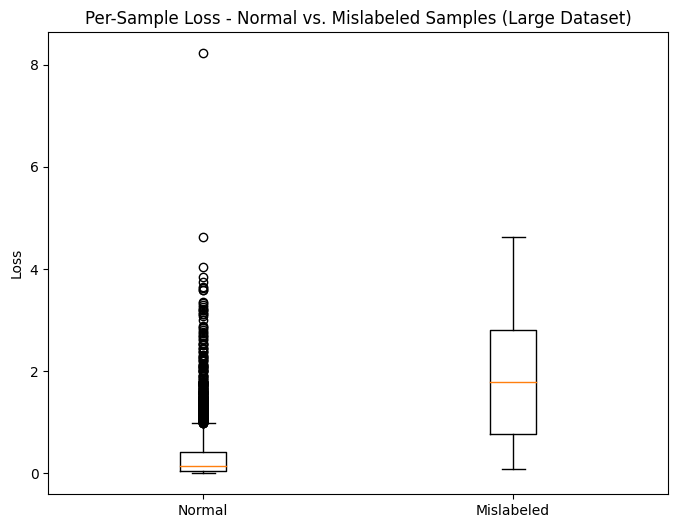

In [25]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, average_precision_score
import matplotlib.pyplot as plt

# Train the Full Model
model_full = LogisticRegression(max_iter=1000)
model_full.fit(X_train_std, y_train)

# Calculate Per-Sample Loss
y_pred_full_probs = model_full.predict_proba(X_train_std)
true_class_probs = np.choose(y_train, y_pred_full_probs.T)
loss_per_sample = -np.log(true_class_probs).reshape(-1, 1)



# Calculate AUROC and AUPR (using the manually calculated losses)
# Convert to numpy array
per_sample_loss = np.array(loss_per_sample)

# Now use the numpy array in the metrics calculation
auroc_per_sample = roc_auc_score(is_flip, per_sample_loss)
auprc_per_sample = average_precision_score(is_flip, per_sample_loss)
print(f"(Large Dataset) Per-Sample Loss - AUROC: {auroc_per_sample:.4f}")
print(f"(Large Dataset) Per-Sample Loss - AUPR: {auprc_per_sample:.4f}")

# Boxplots
plt.figure(figsize=(8, 6))
plt.boxplot([loss_per_sample[~is_flip].ravel(), loss_per_sample[is_flip].ravel()], labels=['Normal', 'Mislabeled'])
plt.title("Per-Sample Loss - Normal vs. Mislabeled Samples (Large Dataset)")
plt.ylabel("Loss")
plt.show()
